# Extintion Times and Probabilities Graph

In [1]:
import sys
import os
sys.path.append("..")
sys.path.append(os.getcwd())
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(font_scale = 2.5)
plt.rcParams['figure.figsize'] = (12, 9)

In [2]:
extinction_times_100 = pd.read_excel("Data/Extinction Times/100_infection_every_scenario.xlsx")

In [3]:
extinction_times_100

,Unnamed: 0,hazard_rate_scale,infection_reporting_prob,contact_tracing_success_prob,contact_trace_delay_par,global_contact_reduction,two_step_tracing,prob_has_trace_app,backwards_trace,end_reason,...,720,721,722,723,724,725,726,727,728,729
0,0,0.250799,0.5,0.746676,2.036833,0.044142,True,0.286461,False,more_than_X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.237670,0.3,0.858267,2.297820,0.403129,False,0.199056,True,more_than_X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.224541,0.1,0.910580,1.776756,0.459311,True,0.140890,True,more_than_X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.250799,0.5,0.909891,1.857629,0.742877,False,0.281548,False,extinct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.224541,0.1,0.901815,2.053735,0.155624,True,0.336991,True,more_than_X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,0.244234,0.4,0.821276,2.087192,0.289064,True,0.329015,True,more_than_X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,4996,0.224541,0.1,0.768086,1.706138,0.765018,True,0.098135,False,extinct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,4997,0.244234,0.4,0.718670,1.978020,0.742882,True,0.266199,True,extinct,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4998,4998,0.237670,0.3,0.719045,1.567098,0.405537,False,0.486980,False,more_than_X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
went_extinct_100 = extinction_times_100.loc[
    (extinction_times_100["end_reason"] == "extinct") &
    (extinction_times_100["extinction_time"] != 15)]

In [5]:
went_extinct_100['global_contact_reduction_formatted'] = went_extinct_100['global_contact_reduction'] * 100 

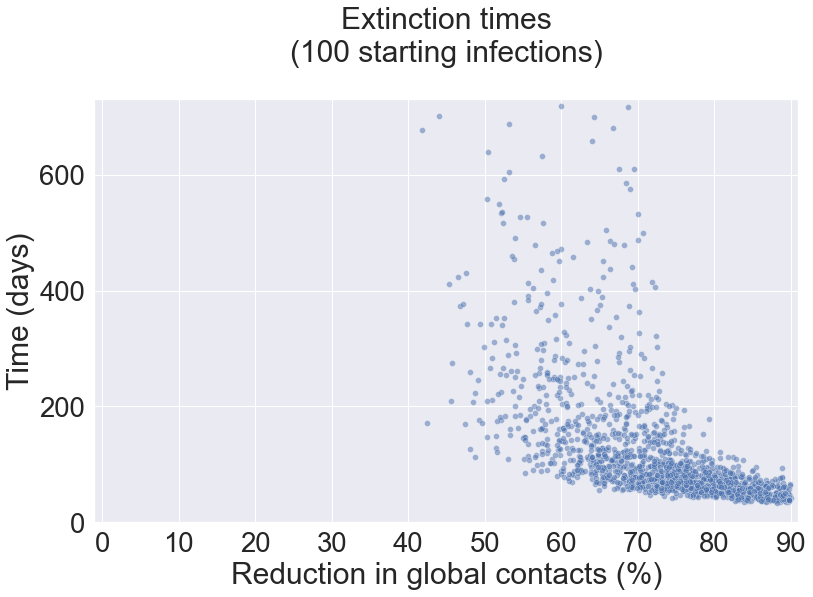

In [6]:
sns.scatterplot(x="global_contact_reduction_formatted",
                y="extinction_time",
                data = went_extinct_100,
                alpha = 0.5)
plt.xlim(-1,91)
plt.title("Extinction times\n(100 starting infections)\n")
plt.xlabel("Reduction in global contacts (%)")
plt.ylabel("Time (days)")
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.ylim(0, 730)
plt.tight_layout()
plt.savefig('Figures/Extinction Times/extinction_times_per_gcr_100inf.jpg')
plt.savefig('Figures/Extinction Times/extinction_times_per_gcr_100inf.pdf')
plt.savefig('Figures/Extinction Times/extinction_times_per_gcr_100inf.png')

In [7]:
extinction_times_1 = pd.read_excel("Data/Extinction Times/1_infection_every_scenario.xlsx")

In [8]:
went_extinct_1 = extinction_times_1.loc[
    (extinction_times_1["end_reason"] == "extinct") &
    (extinction_times_1["extinction_time"] != 15)]

In [9]:
went_extinct_1['global_contact_reduction_formatted'] = went_extinct_1['global_contact_reduction'] * 100 

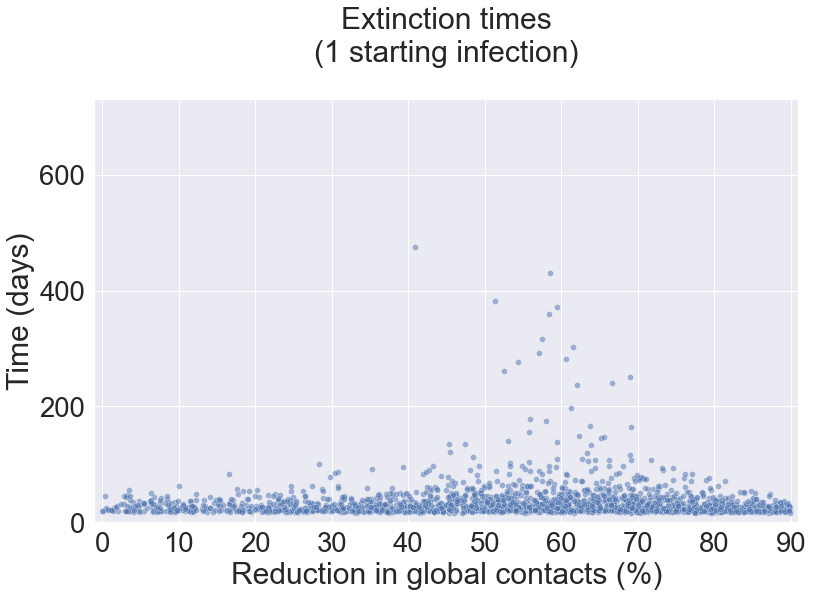

In [10]:
sns.scatterplot(x="global_contact_reduction_formatted",
                y="extinction_time",
                data = went_extinct_1,
                alpha = 0.5)
plt.xlim(-1,91)
#plt.ylim(0, 500)
plt.title("Extinction times\n(1 starting infection)\n")
plt.xlabel("Reduction in global contacts (%)")
plt.ylabel("Time (days)")
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
plt.ylim(0, 730)
plt.tight_layout()
plt.savefig('Figures/Extinction Times/extinction_times_per_gcr_1inf.jpg')
plt.savefig('Figures/Extinction Times/extinction_times_per_gcr_1inf.pdf')
plt.savefig('Figures/Extinction Times/extinction_times_per_gcr_1inf.png')

In [11]:
dat = extinction_times_100
#dat = extinction_times_1

dat['end_state'] = dat['end_reason'] 
dat['end_state']
dat.loc[dat.extinction_time == 15, ['end_state']] = 'extinct15'

dat.end_state.value_counts()

# make it a categorical type
dat.end_state= dat.end_state.astype(pd.api.types.CategoricalDtype(categories=['extinct', 'extinct15', 'more_than_X', 'timed_out']))
dat.end_state.value_counts()



more_than_X    3256
extinct        1680
timed_out        64
extinct15         0
Name: end_state, dtype: int64

In [12]:
# Make a variable to use on the x axis that can be shared by bars 
# But this makes global contact reduction a discrete variable for which 
# there can be stacked bars

dat['global_contact_reduction_rnd'] = np.around(dat.global_contact_reduction, decimals=2)

tab = pd.crosstab(index=dat['global_contact_reduction_rnd'],     
                      columns="count")

print(tab)

col_0                         count
global_contact_reduction_rnd       
0.00                             17
0.01                             60
0.02                             53
0.03                             65
0.04                             75
...                             ...
0.86                             57
0.87                             61
0.88                             44
0.89                             62
0.90                             24

[91 rows x 1 columns]


In [13]:
dat.sort_values(by=['global_contact_reduction_rnd'], inplace=True)

In [14]:
dat['global_contact_reduction_rnd_old'] = dat['global_contact_reduction_rnd']
dat['global_contact_reduction_rnd'] = dat['global_contact_reduction_rnd'] * 100

In [15]:
dat['global_contact_reduction_rnd'] = dat['global_contact_reduction_rnd'].astype('int')

In [16]:
# Get proportion of epidemics that went extinct for each percentage reduction 
# global contacts

gcrs = np.unique(dat.global_contact_reduction_rnd)

index = pd.Index(gcrs, name='reduction')

extinct_val = []
extinct15_val = []
expo_val = []
timeout_val = []
ext = []


for gcr in gcrs: 
    subset = dat.loc[dat.global_contact_reduction_rnd == gcr]
    val_tot = len(subset.end_state)
    
    val0_freq = subset.groupby('end_state').size()['extinct']
    val0_per = val0_freq/val_tot * 100
    extinct_val.append(val0_per)
    
    val1_freq = subset.groupby('end_state').size()['extinct15']
    val1_per = val1_freq/val_tot * 100
    extinct15_val.append(val1_per)
    
    val2_freq = subset.groupby('end_state').size()['more_than_X']
    val2_per = val2_freq/val_tot * 100
    expo_val.append(val2_per)
    
    val3_freq = subset.groupby('end_state').size()['timed_out']
    val3_per = val3_freq/val_tot * 100
    timeout_val.append(val3_per)

    data = {
    'Went extinct': extinct_val,
    'Never grew': extinct15_val,
    'Grew exponentially': expo_val,
    'Timed out': timeout_val
}

df = pd.DataFrame(data, index=index)
print(df)

           Went extinct  Never grew  Grew exponentially  Timed out
reduction                                                         
0                   0.0         0.0               100.0        0.0
1                   0.0         0.0               100.0        0.0
2                   0.0         0.0               100.0        0.0
3                   0.0         0.0               100.0        0.0
4                   0.0         0.0               100.0        0.0
...                 ...         ...                 ...        ...
86                100.0         0.0                 0.0        0.0
87                100.0         0.0                 0.0        0.0
88                100.0         0.0                 0.0        0.0
89                100.0         0.0                 0.0        0.0
90                100.0         0.0                 0.0        0.0

[89 rows x 4 columns]


In [17]:
sns.set_style('white')
sns.despine(left = True, bottom=True)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax = df.plot(kind='bar', stacked=True, rot = 0, edgecolor = 'white', linewidth = 0.2, width = 1)
ax.set_ylabel('Proportion (%)')
ax.set_xlabel('Reduction in global contacts (%)')
ax.set_title('End states by global contact reduction\n(100 starting infections)\n ')
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n not in [0, 10, 20, 29, 39, 49, 58, 68, 78, 88]:
        label.set_visible(False)
ax.set_ylim(0, 100)

plt.tight_layout()

plt.savefig('Figures/Extinction Times/Prop_end_state_contact_reductions_100inf.png')
plt.savefig('Figures/Extinction Times/Prop_end_state_contact_reductions_100inf.pdf')
plt.savefig('Figures/Extinction Times/Prop_end_state_contact_reductions_100inf.jpg')

plt.show()

NameError: name 'ax' is not defined

In [170]:
dat = extinction_times_1

dat['end_state'] = dat['end_reason'] 
dat['end_state']
dat.loc[dat.extinction_time == 15, ['end_state']] = 'extinct15'

dat.end_state.value_counts()

# make it a categorical type
dat.end_state= dat.end_state.astype(pd.api.types.CategoricalDtype(categories=['extinct', 'extinct15', 'more_than_X', 'timed_out']))
dat.end_state.value_counts()

extinct        1989
more_than_X    1778
extinct15      1228
timed_out         5
Name: end_state, dtype: int64

In [171]:
# Make a variable to use on the x axis that can be shared by bars 
# But this makes global contact reduction a discrete variable for which 
# there can be stacked bars

dat['global_contact_reduction_rnd'] = np.around(dat.global_contact_reduction, decimals=2)

tab = pd.crosstab(index=dat['global_contact_reduction_rnd'],     
                      columns="count")

print(tab)

col_0                         count
global_contact_reduction_rnd       
0.00                             22
0.01                             68
0.02                             50
0.03                             51
0.04                             61
...                             ...
0.86                             64
0.87                             54
0.88                             47
0.89                             53
0.90                             35

[91 rows x 1 columns]


In [172]:
dat.sort_values(by=['global_contact_reduction_rnd'], inplace=True)

In [173]:
dat['global_contact_reduction_rnd_old'] = dat['global_contact_reduction_rnd']
dat['global_contact_reduction_rnd'] = dat['global_contact_reduction_rnd'] * 100

In [174]:
dat['global_contact_reduction_rnd'] = dat['global_contact_reduction_rnd'].astype('int')

In [175]:
# Get proportion of epidemics that went extinct for each percentage reduction 
# global contacts

gcrs = np.unique(dat.global_contact_reduction_rnd)

index = pd.Index(gcrs, name='reduction')

extinct_val = []
extinct15_val = []
expo_val = []
timeout_val = []
ext = []


for gcr in gcrs: 
    subset = dat.loc[dat.global_contact_reduction_rnd == gcr]
    val_tot = len(subset.end_state)
    
    val0_freq = subset.groupby('end_state').size()['extinct']
    val0_per = val0_freq/val_tot * 100
    extinct_val.append(val0_per)
    
    val1_freq = subset.groupby('end_state').size()['extinct15']
    val1_per = val1_freq/val_tot * 100
    extinct15_val.append(val1_per)
    
    val2_freq = subset.groupby('end_state').size()['more_than_X']
    val2_per = val2_freq/val_tot * 100
    expo_val.append(val2_per)
    
    val3_freq = subset.groupby('end_state').size()['timed_out']
    val3_per = val3_freq/val_tot * 100
    timeout_val.append(val3_per)

    data = {
    'Went extinct': extinct_val,
    'Never grew': extinct15_val,
    'Grew exponentially': expo_val,
    'Timed out': timeout_val
}

df = pd.DataFrame(data, index=index)
print(df)

           Went extinct  Never grew  Grew exponentially  Timed out
reduction                                                         
0             13.636364    9.090909           77.272727        0.0
1              8.823529    5.882353           85.294118        0.0
2             10.000000   10.000000           80.000000        0.0
3             17.647059    3.921569           78.431373        0.0
4             19.672131    4.918033           75.409836        0.0
...                 ...         ...                 ...        ...
86            40.625000   59.375000            0.000000        0.0
87            50.000000   50.000000            0.000000        0.0
88            44.680851   55.319149            0.000000        0.0
89            41.509434   58.490566            0.000000        0.0
90            34.285714   65.714286            0.000000        0.0

[89 rows x 4 columns]


<Figure size 864x648 with 0 Axes>

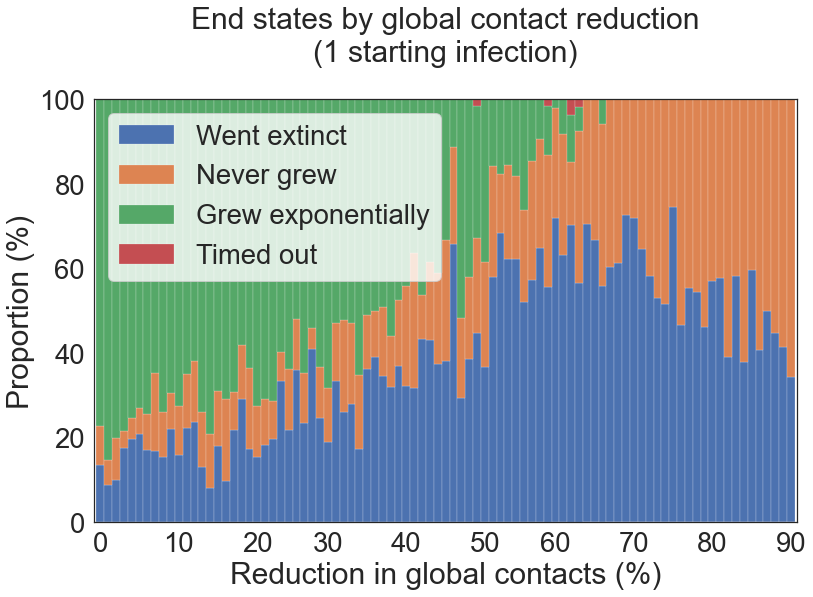

In [176]:
sns.set_style('white')
sns.despine(left = True, bottom=True)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax = df.plot(kind='bar', stacked=True, rot = 0, edgecolor = 'white', linewidth = 0.2, width = 1)
ax.set_ylabel('Proportion (%)')
ax.set_xlabel('Reduction in global contacts (%)')
ax.set_title('End states by global contact reduction\n(1 starting infection)\n ')
every_nth = 10
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n not in [0, 10, 20, 29, 39, 49, 58, 68, 78, 88]:
        label.set_visible(False)
ax.set_ylim(0, 100)

plt.tight_layout()

plt.savefig('Figures/Extinction Times/Prop_end_state_contact_reductions_1inf.png')
plt.savefig('Figures/Extinction Times/Prop_end_state_contact_reductions_1inf.pdf')
plt.savefig('Figures/Extinction Times/Prop_end_state_contact_reductions_1inf.jpg')

plt.show()